In [2]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Wandb
import wandb

# Bibliotecas Auxiliares
import idx2numpy
import gzip
import numpy as np
import matplotlib.pyplot as plt

In [5]:
!wandb login --relogin

wandb: Appending key for api.wandb.ai to your netrc file: /home/diego/.netrc


In [7]:
run = wandb.init(project="mnist_deep_classification",save_code=True,job_type='train')
dataset_train = 'preprocessed_x_train.npz'
artifact_train = run.use_artifact(f"mnist_deep_classification/{dataset_train}:latest",type='npz')
artifact_train.file()

'./artifacts/preprocessed_x_train.npz:v0/preprocessed_x_train.npz'

In [18]:
x_train = np.load(artifact_train.file())['imgs']

In [19]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [13]:
y_dataset_train = 'train-labels-idx1-ubyte.gz'
y_artifact_train= run.use_artifact(f"mnist_deep_classification/{y_dataset_train}:latest",type='gzip')
y_artifact_train.file()

'./artifacts/train-labels-idx1-ubyte.gz:v0/train-labels-idx1-ubyte.gz'

In [14]:
with gzip.open(y_artifact_train.file(), 'r') as f:
    y_train = idx2numpy.convert_from_file(f)


In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


2022-07-23 16:27:39.769823: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-07-23 16:27:39.774506: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-23 16:27:39.775385: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-23 16:27:39.775841: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-23 16:27:39.776376: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [21]:
model.fit(x_train, y_train, epochs=15)


Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2618 - accuracy: 0.9243
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1129 - accuracy: 0.9670
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0776 - accuracy: 0.9766
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0577 - accuracy: 0.9823
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0433 - accuracy: 0.9867
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0344 - accuracy: 0.9896
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0279 - accuracy: 0.9911
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0227 - accuracy: 0.9930
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0177 - accuracy: 0.9946
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

In [24]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)


313/313 - 0s - loss: 0.1833 - accuracy: 0.9715 - 288ms/epoch - 919us/step


In [25]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [26]:
model.save('/mnt/c/Users/diego/Desktop/projeto pdi_machine_learning/projeto-pdi_machine_learning/app/model')

INFO:tensorflow:Assets written to: /mnt/c/Users/diego/Desktop/projeto pdi_machine_learning/projeto-pdi_machine_learning/app/model/assets


In [27]:
model2 = keras.models.load_model('/mnt/c/Users/diego/Desktop/projeto pdi_machine_learning/projeto-pdi_machine_learning/app/model')


In [44]:
import cv2
predction = model2.predict([x_test])

313/313 [==============================] - 0s 1ms/step


In [51]:
type(x_test)

numpy.ndarray

In [53]:
x_test[10].min()

0.0

0

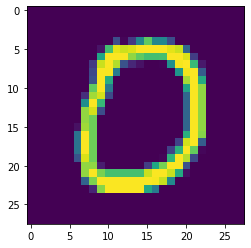

In [46]:
predction[1]
plt.imshow(x_test[10])
np.argmax(predction[10])
